In [68]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

### Q1 Read the input file and check the data dimension

In [69]:
#Read input file and understand the data
# "default" is my dependent variable
bank_data = pd.read_csv('bank.csv')

In [70]:
bank_data.shape

(1000, 21)

In [71]:
bank_data.head()

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [72]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
default                       1000 non-null int64
account_check_status          1000 non-null object
duration_in_month             1000 non-null int64
credit_history                1000 non-null object
purpose                       1000 non-null object
credit_amount                 1000 non-null int64
savings                       1000 non-null object
present_emp_since             1000 non-null object
installment_as_income_perc    1000 non-null int64
personal_status_sex           1000 non-null object
other_debtors                 1000 non-null object
present_res_since             1000 non-null int64
property                      1000 non-null object
age                           1000 non-null int64
other_installment_plans       1000 non-null object
housing                       1000 non-null object
credits_this_bank             1000 non-null int64
job                           1000

In [73]:
bank_data.describe()

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.300000,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,0.458487,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,0.000000,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,0.000000,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,0.000000,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,1.000000,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,1.000000,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [74]:
bank_data.isna().any()

default                       False
account_check_status          False
duration_in_month             False
credit_history                False
purpose                       False
credit_amount                 False
savings                       False
present_emp_since             False
installment_as_income_perc    False
personal_status_sex           False
other_debtors                 False
present_res_since             False
property                      False
age                           False
other_installment_plans       False
housing                       False
credits_this_bank             False
job                           False
people_under_maintenance      False
telephone                     False
foreign_worker                False
dtype: bool

dats set has no missing values.

In [75]:
bank_data.columns.values

array(['default', 'account_check_status', 'duration_in_month',
       'credit_history', 'purpose', 'credit_amount', 'savings',
       'present_emp_since', 'installment_as_income_perc',
       'personal_status_sex', 'other_debtors', 'present_res_since',
       'property', 'age', 'other_installment_plans', 'housing',
       'credits_this_bank', 'job', 'people_under_maintenance',
       'telephone', 'foreign_worker'], dtype=object)

In [76]:
bank_data.nunique()

default                         2
account_check_status            4
duration_in_month              33
credit_history                  5
purpose                        10
credit_amount                 921
savings                         5
present_emp_since               5
installment_as_income_perc      4
personal_status_sex             4
other_debtors                   3
present_res_since               4
property                        4
age                            53
other_installment_plans         3
housing                         3
credits_this_bank               4
job                             4
people_under_maintenance        2
telephone                       2
foreign_worker                  2
dtype: int64

In [77]:
#lets check the distribution of the target varible.
bank_data.default.value_counts()

0    700
1    300
Name: default, dtype: int64

In [78]:
out of 1000 customers, only 300 members took personal loan and 700 members are not interested.

SyntaxError: invalid syntax (<ipython-input-78-5ff4e7b0f7a9>, line 1)

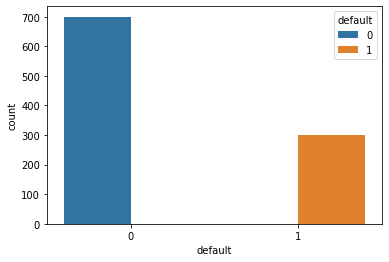

In [79]:
sns.countplot(x='default', hue='default', data=bank_data)

In [80]:
# Lets build a Ensemble model but need to modify the dataset first

### Q2.Prepare the model data by converting non-numeric to dummy ( 1 Marks)
##### Hint: Use get_dummies

In [81]:
model_bank_data = pd.get_dummies(bank_data)

In [82]:
# Print Shape of model data
model_bank_data.shape

(1000, 62)

In [83]:
model_bank_data.head(2)

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_0 <= ... < 200 DM,account_check_status_< 0 DM,...,housing_own,housing_rent,job_management/ self-employed/ highly qualified employee/ officer,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,telephone_none,"telephone_yes, registered under the customers name",foreign_worker_no,foreign_worker_yes
0,0,6,1169,4,4,67,2,1,0,1,...,1,0,0,1,0,0,0,1,0,1
1,1,48,5951,2,2,22,1,1,1,0,...,1,0,0,1,0,0,1,0,0,1


### Check for highly correlated variables but don't required any treatment for this use case

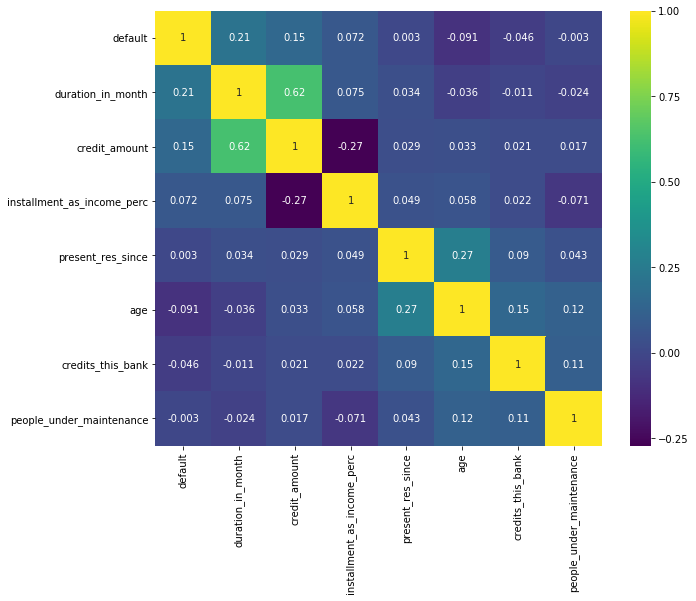

In [84]:
#bank_data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(bank_data.corr(),cmap='viridis',annot=True) 

no variables are highly correlated. 'duration_in_month' and 'credit_amount' are highly correlated to some extent.

### Q3 Split Train/Test data 70:30 ratio( 1 Marks)
##### Hint:from sklearn.model_selection import train_test_split

In [85]:
X = model_bank_data.drop('default', axis = 1)
y = model_bank_data['default']
print(X.shape, y.shape)

(1000, 61) (1000,)


In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

### Q4 Build Random Forest Model( 2 Marks)
#### Hint:from sklearn.ensemble import RandomForestClassifier using n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999

In [87]:
from sklearn.ensemble import RandomForestClassifier

In [88]:
rfcl = RandomForestClassifier(n_estimators = 500 , criterion='entropy', n_jobs=2, random_state=9999)
rfcl.fit(X_train, y_train)
print("Random forest classifier accuracy on train data: ",rfcl.score(X_train , y_train))

Random forest classifier accuracy on train data:  1.0


In [89]:
print("Random forest classifier accuracy on test data: ", rfcl.score(X_test , y_test))

Random forest classifier accuracy on test data:  0.7433333333333333


the accuracy on train data is 100% and on test data it is 74.3% . this means the model is over fitted.

### Q5 Calculate Confusion Matrix and Accuracy score (1 Marks)
##### Hint: Use confusion_matrix and accuracy_score

In [91]:
rfcl_y_predict = rfcl.predict(X_test)
print(metrics.confusion_matrix(y_test, rfcl_y_predict))

[[197  17]
 [ 60  26]]


In [92]:
pd.DataFrame(data=[accuracy_score(y_test, rfcl_y_predict), recall_score(y_test, rfcl_y_predict, average= 'weighted'), precision_score(y_test, rfcl_y_predict, average= 'weighted'), f1_score(y_test, rfcl_y_predict, average= 'weighted')], index=['accuracy', 'recall', 'precision', 'f1_score'])


,0
accuracy,0.743333
recall,0.743333
precision,0.720130
f1_score,0.712272


### Q6 Show the list of the features importance( 1 Marks)

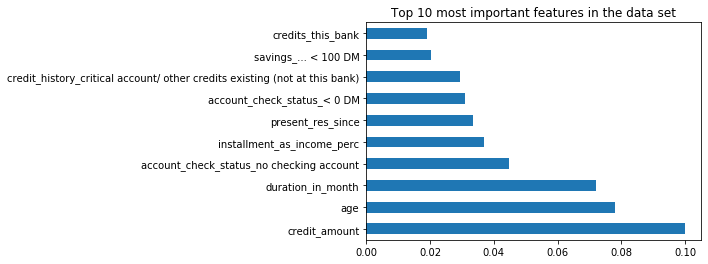

In [93]:
feat_importances = pd.Series(rfcl.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh', title = 'Top 10 most important features in the data set')

Thus the above plot shows that 'credit_amount', 'age', 'duration_in_month','account_check_status_no checking account', and 'installment_as_income_perc' are the first most important features of data set.

### Q7 K-fold cross-validation( 2 Marks)
##### k-fold cross validation( without stratification)
##### Usually k is set as 10-20 in practical settings, depends on data set size

In [94]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

In [95]:
# Use below values
num_folds = 10
seed = 77

In [96]:
#Validate the Random Forest model build above using k fold
cv = cross_validate(rfcl, X, y, return_train_score=True, cv=num_folds)
print("Accuracy on train data is: ", cv['train_score'])

Accuracy on train data is:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [97]:
print("Accuracy on test data is: ", cv['test_score'])

Accuracy on test data is:  [0.82 0.72 0.75 0.77 0.78 0.74 0.74 0.83 0.74 0.79]


In [98]:
#Calculate Mean score
print("Mean score of the models performance is: ", cv['test_score'].mean())

Mean score of the models performance is:  0.768


In [99]:
# Calculate score standard deviation using std()
print("Standard deviation of the models performance is: ", cv['test_score'].std())

Standard deviation of the models performance is:  0.03487119154832538


# Q8 Build Ada boosting model, check the accuracy, and print confusion matrix ( 1 Marks)

In [100]:
from sklearn.ensemble import AdaBoostClassifier

In [101]:
abcl = AdaBoostClassifier( base_estimator=rfcl, n_estimators=50)
abcl.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=RandomForestClassifier(bootstrap=True,
                                                         class_weight=None,
                                                         criterion='entropy',
                                                         max_depth=None,
                                                         max_features='auto',
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         n_estimators=500,
                     

In [102]:
print("Accuracy on train data is: ", abcl.score(X_train , y_train))

Accuracy on train data is:  1.0


In [104]:
y_predict = abcl.predict(X_test)
print("Accuracy on test data is: ", abcl.score(X_test , y_test))

Accuracy on test data is:  0.7633333333333333


In [105]:
print(metrics.confusion_matrix(y_test, y_predict))

[[200  14]
 [ 57  29]]


In [106]:
pd.DataFrame(data=[accuracy_score(y_test, y_predict), recall_score(y_test, y_predict, average= 'weighted'), precision_score(y_test, y_predict, average= 'weighted'), f1_score(y_test, y_predict, average= 'weighted')], index=['accuracy', 'recall', 'precision', 'f1_score'])


,0
accuracy,0.763333
recall,0.763333
precision,0.748457
f1_score,0.734692


# Q9. Build Gradient boosting model, check the accuracy, and print confusion matrix ( 1 Marks)
percentage of correct predictions and Calculate sensitivity (or True Positive Rate or Recall) and Precision.
( 1 Marks)

In [107]:
from sklearn.ensemble import GradientBoostingClassifier

In [108]:
gbcl = GradientBoostingClassifier(n_estimators = 50)
gbcl.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=50,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [109]:
print("Accuracy on train data is: ", gbcl.score(X_train , y_train))

Accuracy on train data is:  0.8785714285714286


In [110]:
y_predict = gbcl.predict(X_test)
print("Gradient boosting model accuracy on this data set is: ", gbcl.score(X_test , y_test))

Gradient boosting model accuracy on this data set is:  0.7466666666666667


In [111]:
print(metrics.confusion_matrix(y_test, y_predict))

[[195  19]
 [ 57  29]]


In [112]:
pd.DataFrame(data=[accuracy_score(y_test, y_predict), recall_score(y_test, y_predict, average= 'weighted'), precision_score(y_test, y_predict, average= 'weighted'), f1_score(y_test, y_predict, average= 'weighted')], index=['accuracy', 'recall', 'precision', 'f1_score'])

,0
accuracy,0.746667
recall,0.746667
precision,0.725179
f1_score,0.721075


In [113]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []

In [114]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

for i in range(bootstrap_iteration):
    X_, y_ = resample(X_train, y_train)
    rfcl.fit(X_, y_)
    y_pred = rfcl.predict(X_test)
    
    acc = accuracy_score(y_pred, y_test)
    accuracy.append(acc)

In [115]:
accuracy = np.array(accuracy)
print('Accuracy Score')
print('Avearge: ', accuracy.mean())
print('Standard deviation: ', accuracy.std())

Accuracy Score
Avearge:  0.7576666666666666
Standard deviation:  0.007753135566408702


When developed the model with random forest classifier, the accuracy on training set is = 100% whereas, accuracy for testing set = 74.3%.
100% accuracy level on training set suggests somewhere the model is overfit. For kfolds = 10, the model has an accuracy of 76.8 but on
the train data, the accuracy is still 100% which indicates that the model is over fitted. with adaboosting, the train accuracy is still
100% where as test accuracy is 76.3%. with gradient boosting model, train accuracy is 87.8% and test accuracy is 74.6%. so we can say that
gradient boosting model is best suited as it overcomes overfitting.